https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset

# Read file and create dataframes
## In this cells I will:
-  Read source data file
-  Create Dataframes of Amazon Stores and Amazon Drop Offs
-  Tranform Pandas Dataframes to Geopandas
-  Assign CRS EPSG:4326 to Geopandas Dataframes

In [9]:
import pandas as pd
import geopandas as gpd

# Load the data
amazon_df = pd.read_csv("/content/amazon_delivery.csv")

In [10]:
# Create Amazon Data Bkp
bkp_df = amazon_df.copy()
bkp_df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [47]:
# Filter wrong geo data
## As it is after 5,5 lat long and we have multiple data bellow this line
amazon_df = amazon_df.loc[(amazon_df['Store_Longitude'] > 5) & (amazon_df['Store_Latitude'] > 5)]
amazon_df = amazon_df.loc[(amazon_df['Drop_Longitude'] > 5) & (amazon_df['Drop_Latitude'] > 5)]

In [11]:
# Create list of Amazon Stores in India
AmazonStores = amazon_df[['Store_Latitude', 'Store_Longitude']].drop_duplicates()
AmazonStores.head()

,Store_Latitude,Store_Longitude
0,22.745049,75.892471
1,12.913041,77.683237
2,12.914264,77.678400
3,11.003669,76.976494
4,12.972793,80.249982


In [12]:
# Filter and clean data
AmazonStores = AmazonStores.loc[(AmazonStores['Store_Longitude'] > 5) & (AmazonStores['Store_Latitude'] > 5)]
AmazonStores = AmazonStores.dropna(subset=['Store_Longitude', 'Store_Latitude'])

In [13]:
# Assign crs epsg:4326 to match mapping plot
AmazonStoresCRS = gpd.GeoDataFrame(AmazonStores, geometry=gpd.points_from_xy(AmazonStores['Store_Longitude'], AmazonStores['Store_Latitude']))

AmazonStoresCRS.crs = {'init': 'epsg:4326'}

AmazonStoresCRS.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Store_Latitude,Store_Longitude,geometry
0,22.745049,75.892471,POINT (75.89247 22.74505)
1,12.913041,77.683237,POINT (77.68324 12.91304)
2,12.914264,77.678400,POINT (77.67840 12.91426)
3,11.003669,76.976494,POINT (76.97649 11.00367)
4,12.972793,80.249982,POINT (80.24998 12.97279)


In [40]:
# Filter and clean data
AmazonDropOf = amazon_df[['Drop_Latitude', 'Drop_Longitude']].drop_duplicates()

AmazonDropOf = AmazonDropOf.dropna(subset=['Drop_Longitude', 'Drop_Latitude'])
AmazonDropOf = AmazonDropOf.loc[(AmazonDropOf['Drop_Longitude'] > 5) & (AmazonDropOf['Drop_Latitude'] > 5)]

,Drop_Latitude,Drop_Longitude
0,22.765049,75.912471
1,13.043041,77.813237
2,12.924264,77.688400
3,11.053669,77.026494
4,13.012793,80.289982


In [43]:
# Assign crs epsg:4326 to match mapping plot
AmazonDropOfCrs = gpd.GeoDataFrame(AmazonDropOf, geometry=gpd.points_from_xy(AmazonDropOf['Drop_Longitude'], AmazonDropOf['Drop_Latitude']))

AmazonDropOfCrs.crs = {'init': 'epsg:4326'}

AmazonDropOfCrs.crs

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


72.778726

In [16]:
import geopandas as gpd

# Load a GeoDataFrame with country boundaries of India
world = gpd.read_file('110m_cultural.zip')

India = world.loc[(world['SOVEREIGNT'] == 'India')]
India.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
98,Admin-0 country,1,2,India,IND,0,2,Sovereign country,1,India,...,None,None,None,None,None,None,None,None,None,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [17]:
# Import Indian states from SHP file and check crs
IndiaStates = gpd.read_file('/content/india/Indian_states.shp')
IndiaStates.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
# check crs
India.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# check crs
AmazonStoresCRS.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Ploting Amazon Stores and Drop Offs


<Axes: >

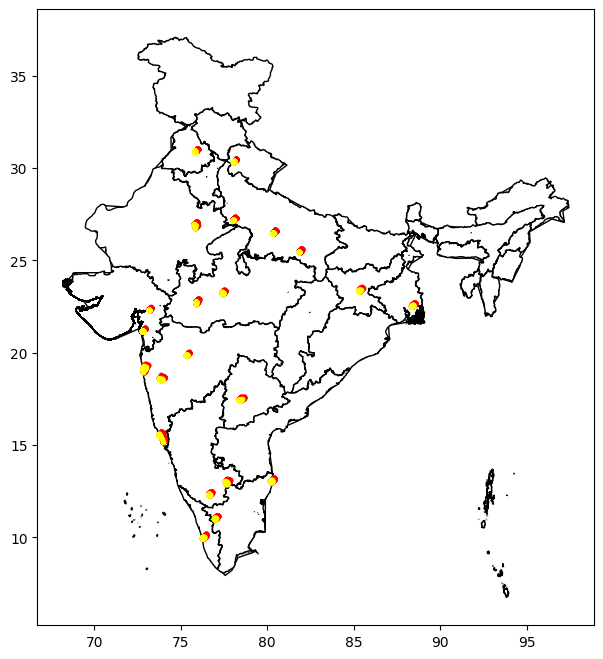

In [46]:
# Plot Map of India, States, Amazon Stores and Amazon Drop Ofs
ax = India.plot(figsize=(8,8), color='white', linestyle='-', edgecolor='black')
IndiaStates.plot(ax=ax, color='white', linestyle='-', edgecolor='black')
AmazonDropOfCrs.plot(ax=ax, color='red', markersize=10)
AmazonStoresCRS.plot(ax=ax, markersize=10, color='yellow')

# Ploting Drop Offs Areas

In [72]:
from folium.plugins import HeatMap
import folium

map_center = [AmazonDropOfCrs['Drop_Latitude'].mean(), AmazonDropOfCrs['Drop_Longitude'].mean()]

# Combine store and drop locations for heatmap
locations = AmazonDropOfCrs[['Drop_Latitude', 'Drop_Longitude']].values.tolist()

# Create a base map
m_heat = folium.Map(location=map_center, zoom_start=5)

# Add heatmap
HeatMap(locations).add_to(m_heat)

m_heat

Following this article, its visible to see the areas with most emission having similarities in our drop off dash:

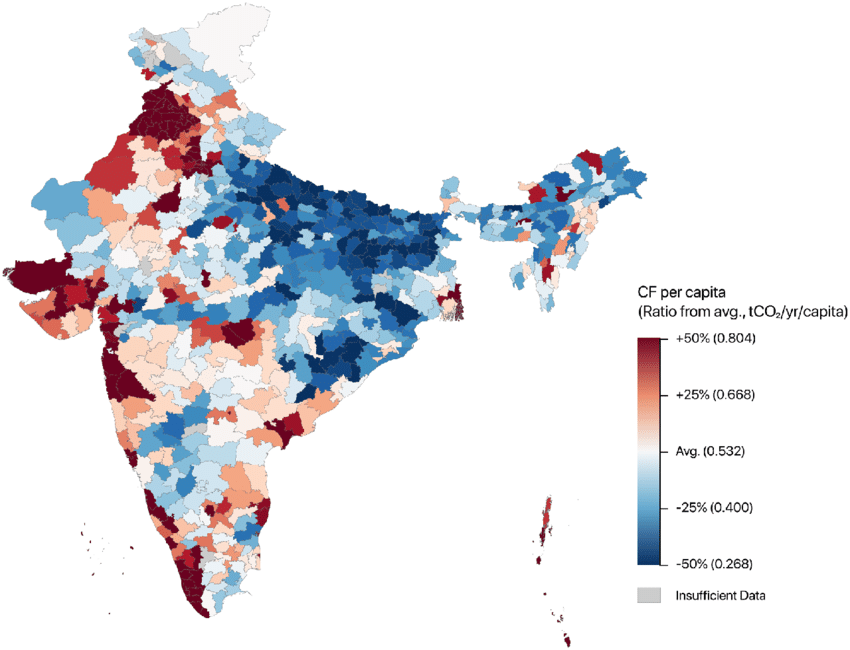

https://www.researchgate.net/figure/Carbon-footprints-per-capita-in-623-districts-in-India-Choropleth-map-showing-the_fig2_347625606

# Calculating Distances from Amazon Stores to Drop Offs Using Geopy
#### I'm considering that every drop off comes directly from the store, without any routes beeing used for more than one delivery
- I'm using geopy to estimate the shortest distance possible in the map, not considering roads on train routes

In [54]:
# Using geopy to create column containing the minimum distance between the store and drop of

from geopy.distance import geodesic

DistanceAmazon = amazon_df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']].copy()

# Function to calculate distance between two points
def calculate_distance(row):
    store_location = (row['Store_Latitude'], row['Store_Longitude'])
    drop_location = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store_location, drop_location).kilometers

# Calculate the distance for each row
DistanceAmazon['Distance_KM_Geopy'] = DistanceAmazon.apply(calculate_distance, axis=1)
DistanceAmazon.head()


,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_KM_Geopy
0,22.745049,75.892471,22.765049,75.912471,3.020737
1,12.913041,77.683237,13.043041,77.813237,20.143737
2,12.914264,77.678400,12.924264,77.688400,1.549693
3,11.003669,76.976494,11.053669,77.026494,7.774497
4,12.972793,80.249982,13.012793,80.289982,6.197898


# Calculating Distances from Amazon Stores to Drop Offs Using GCP API Directions
#### I'm considering that every drop off comes directly from the store, without any routes beeing used for more than one delivery
- I'm using GCP API Directions so we can have an exact format of estimating the CO2 emissions, but for this project I'll use a small sample and use an median value from GCP estimated Distance and Geopy estimated Distance to calculate the emissions

In [58]:
# Select 200 random rows to process in the API Directions from GCP
DistanceAmazonSample = DistanceAmazon.sample(n=200, random_state=42)

# Display the first few rows of the new dataframe
DistanceAmazonSample.head()

,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_KM_Geopy
21057,22.745049,75.892471,22.795049,75.942471,7.551468
26355,11.022477,76.995667,11.112477,77.085667,13.993203
32144,23.353783,85.326967,23.373783,85.346967,3.014602
11335,12.981615,80.231598,12.991615,80.241598,1.549493
8100,21.152760,72.778059,21.242760,72.868059,13.661065


In [61]:
# Google Directions API Example code

import requests
import pandas as pd
import time

# Your Google API Key
API_KEY = 'YOUR_API_KEY'

# Function to get route distance and duration from Google Directions API
def get_route_info(origin, destination):
    url = f"https://maps.googleapis.com/maps/api/directions/json?origin={origin}&destination={destination}&key={API_KEY}"
    response = requests.get(url).json()

    # Return None if no route is found
    if not response['routes']:
        return None, None

    leg = response['routes'][0]['legs'][0]
    return leg['distance']['value'], leg['duration']['value']

# Apply the function to each row in the dataframe
def get_distance_duration(row):
    origin = f"{row['Store_Latitude']},{row['Store_Longitude']}"
    destination = f"{row['Drop_Latitude']},{row['Drop_Longitude']}"

    distance, duration = get_route_info(origin, destination)

    # Convert distance from meters to kilometers, and duration from seconds to minutes
    distance_km = distance / 1000 if distance else None  # Convert meters to km
    duration_min = duration / 60 if duration else None   # Convert seconds to minutes

    # Small delay to avoid rate limiting
    time.sleep(1)

    return pd.Series([distance_km, duration_min])


# Apply get_distance_duration to each row in the dataframe
DistanceAmazonSample[['Distance_km_GCP', 'Duration_minutes_GCP']] = DistanceAmazonSample.apply(get_distance_duration, axis=1)

# Show updated dataframe
DistanceAmazonSample


,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_KM_Geopy,Distance_km_GCP,Duration_minutes_GCP
21057,22.745049,75.892471,22.795049,75.942471,7.551468,12.192,26.316667
26355,11.022477,76.995667,11.112477,77.085667,13.993203,16.723,33.883333
32144,23.353783,85.326967,23.373783,85.346967,3.014602,3.946,13.500000
11335,12.981615,80.231598,12.991615,80.241598,1.549493,2.957,9.000000
8100,21.152760,72.778059,21.242760,72.868059,13.661065,17.928,40.366667
...,...,...,...,...,...,...,...
19783,22.695207,75.866059,22.775207,75.946059,12.083736,17.333,35.350000
13959,21.175975,72.795503,21.205975,72.825503,4.553784,5.204,16.233333
16640,11.022169,76.999594,11.042169,77.019594,3.109781,4.407,12.183333
36339,18.514210,73.838429,18.594210,73.918429,12.236712,15.086,36.550000


In [62]:
# Backup GCP Estimations
DistanceAmazonSample.to_csv('DistanceAmazonSample.csv')

In [65]:
# Create a new column with the absolute error between Distance_KM_Geopy and Distance_km_GCP
DistanceAmazonSample['Error_Geopy_GCP'] = abs(DistanceAmazonSample['Distance_KM_Geopy'] - DistanceAmazonSample['Distance_km_GCP'])

# Calculate the median error
median_error = DistanceAmazonSample['Error_Geopy_GCP'].median()

print(f"\nMedian Error between Geopy and GCP (in KM): {median_error}")



Median Error between Geopy and GCP (in KM): 3.667795033604709


In [68]:
DistanceAmazon['Error_Geopy_Plus_Median'] = abs(DistanceAmazon['Distance_KM_Geopy'] + median_error)
DistanceAmazon.head()

,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_KM_Geopy,Error_Geopy_Plus_Median
0,22.745049,75.892471,22.765049,75.912471,3.020737,6.688532
1,12.913041,77.683237,13.043041,77.813237,20.143737,23.811532
2,12.914264,77.678400,12.924264,77.688400,1.549693,5.217488
3,11.003669,76.976494,11.053669,77.026494,7.774497,11.442292
4,12.972793,80.249982,13.012793,80.289982,6.197898,9.865693


# Calculating the Average CO2 emission based on the minimum Km route and estimated route using median from our Api Dataframe
- Estimated carbon emissions with geopy: 46619.30 kg CO2
- Estimated carbon emissions with geopy plus median: 64244.97 kg CO2

In [71]:
total_distance_geopy = DistanceAmazon['Distance_KM_Geopy'].sum()
total_distance_geopy_plus_median = DistanceAmazon['Error_Geopy_Plus_Median'].sum()

# Assuming average emissions per km (for delivery trucks, e.g., 0.12 kg CO2 per km)
emissions_per_km = 0.12  # kg CO2 per km

# Calculate total emissions
total_emissions_geopy = total_distance_geopy * emissions_per_km
total_emissions_geopy_plus_median = total_distance_geopy_plus_median * emissions_per_km
print(f"Estimated carbon emissions geopy: {total_emissions_geopy:.2f} kg CO2")
print(f"Estimated carbon emissions geopy plus median: {total_emissions_geopy_plus_median:.2f} kg CO2")


Estimated carbon emissions geopy: 46619.30 kg CO2
Estimated carbon emissions geopy plus median: 64244.97 kg CO2
